# NBA - 2023 Data Analysis & Win Predection Based on Historical Data


 We have NBA-2023 data which includes teams, top players, game dates, results, wins,loss etc. The book contains analysis of the data and based on that we can predeict the win for a specific team. The data is loaded from a github repository, and loaded via the url.

In [1]:
import pandas as pd

# Read the data from the URL into a DataFrame
url = 'https://raw.githubusercontent.com/bbwieland/ncaa-projections/main/data/KenPomGamesCleaned.csv'
df = pd.read_csv(url)   #loading the data from the url into the dataframe

# Displaying the first 10 rows of the DataFrame
df.head(10)
print("Displaying first 10 rows in the dataset")
print(df.head(10))

# Displaying basic information about the DataFrame
print("Basic Information:")
print(df.info())

# Summary statistics for categorical columns
print("\nCategorical Column Summary:")
print(df.describe(include=['object']))

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Displaying first 10 rows in the dataset
   team_rk     team  opponent_rk           opponent     result  poss  ot  \
0        7  Houston          219  Northern Colorado   W, 83-36    64   0   
1        6  Houston          210     Saint Joseph's   W, 81-55    69   0   
2        4  Houston           59       Oral Roberts   W, 83-45    67   0   
3        4  Houston          307     Texas Southern   W, 83-48    66   0   
4        3  Houston           47             Oregon   W, 66-56    60   0   
5        2  Houston           75           Kent St.   W, 49-44    70   0   
6        2  Houston          179        Norfolk St.  W, 100-52    64   0   
7        1  Houston            8       Saint Mary's   W, 53-48    56   0   
8        1  Houston          226      North Florida   W, 76-42    61   0   
9        1  Houston            3            Alabama   L, 71-65    72   0   

   pre_wp   location  w  ...  w_conference_proj  l_conference_proj  \
0     NaN       Home  1  ...                  0      

Based on the results above, we know the data has **10150 rows** and **30 columns**. There are missing values in 4 columns. Out of 4, 1 column has every entry missing so we will be dropping that column completely, we can fill the values in the other 2 columns as the number of missing values is less. The column with high number of missing column will also be dropped.

In [2]:
# Drop the column with all missing values
df = df.drop(columns=['pre_wp'])

# Impute missing values for w_conference and l_conference (example: filling with 0)
df['w_conference'].fillna(0, inplace=True)
df['l_conference'].fillna(0, inplace=True)

# Drop the column with a high number of missing values
df = df.drop(columns=['tiers_of_joy'])


In [3]:
# checking for missing values again 

print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
team_rk              0
team                 0
opponent_rk          0
opponent             0
result               0
poss                 0
ot                   0
location             0
w                    0
l                    0
w_conference         0
l_conference         0
conference_game      0
postseason           0
year                 0
day_date             0
game_date            0
w_proj               0
l_proj               0
w_conference_proj    0
l_conference_proj    0
date                 0
game_id              0
win_loss             0
team_score           0
opp_score            0
team_ppp             0
opp_ppp              0
dtype: int64


Upon checking again we can see the dataset no longer has any missing values and it can be used for further exploratory data analysis. 

# Exploratory Data Analysis

In [4]:
# descriptive statistics

# Displaying summary statistics for numeric columns
summary_stats = df.describe()

# Displaying summary statistics for categorical columns
categorical_stats = df.describe(include='object')

print("Numeric Columns Summary Statistics:")
print(summary_stats)

print("\nCategorical Columns Summary Statistics:")
print(categorical_stats)

Numeric Columns Summary Statistics:
            team_rk   opponent_rk          poss            ot             w  \
count  10150.000000  10150.000000  10150.000000  10150.000000  10150.000000   
mean     180.782365    181.063153     68.613202      0.070542      8.368670   
std      105.129380    105.200584      5.660471      0.295380      5.402733   
min        1.000000      1.000000     47.000000      0.000000      0.000000   
25%       89.000000     90.000000     65.000000      0.000000      4.000000   
50%      180.000000    180.000000     68.000000      0.000000      8.000000   
75%      271.000000    272.000000     72.000000      0.000000     12.000000   
max      363.000000    363.000000    101.000000      4.000000     28.000000   

                  l  w_conference  l_conference     year     game_date  \
count  10150.000000  10150.000000  10150.000000  10150.0  1.015000e+04   
mean       7.264433      2.737438      2.739113   2023.0  2.022608e+07   
std        5.202948      3.437

In [26]:
#Data profile
data_profile = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
    'Missing Values': df.isnull().sum(),
})

print(data_profile)

                              Column       Data Type  Unique Values  \
team_rk                      team_rk           int64            363   
team                            team          object            363   
opponent_rk              opponent_rk           int64            363   
opponent                    opponent          object            363   
result                        result          object           2604   
poss                            poss           int64             48   
ot                                ot           int64              5   
location                    location          object              5   
w                                  w           int64             29   
l                                  l           int64             29   
w_conference            w_conference         float64             19   
l_conference            l_conference         float64             19   
conference_game      conference_game            bool              2   
postse

In [28]:
# Value counts for categorical columns
# Display value counts for a specific column (e.g., 'team' column)
team_counts = df['team'].value_counts()
print("Value Counts for 'team' column:")
print(team_counts)

Value Counts for 'team' column:
team
Towson                    31
Green Bay                 31
Monmouth                  31
Lafayette                 31
Central Connecticut       31
                          ..
Princeton                 24
Cornell                   24
Maryland Eastern Shore    23
North Carolina Central    22
New Mexico St.            21
Name: count, Length: 363, dtype: int64


In [33]:
# Data filtering and slicing
# Filter rows based on a condition (e.g., games with a certain team)
filtered_df = df[df['team'] == 'Houston']
print(filtered_df)

    team_rk     team  opponent_rk            opponent     result  poss  ot  \
0         7  Houston          219   Northern Colorado   W, 83-36    64   0   
1         6  Houston          210      Saint Joseph's   W, 81-55    69   0   
2         4  Houston           59        Oral Roberts   W, 83-45    67   0   
3         4  Houston          307      Texas Southern   W, 83-48    66   0   
4         3  Houston           47              Oregon   W, 66-56    60   0   
5         2  Houston           75            Kent St.   W, 49-44    70   0   
6         2  Houston          179         Norfolk St.  W, 100-52    64   0   
7         1  Houston            8        Saint Mary's   W, 53-48    56   0   
8         1  Houston          226       North Florida   W, 76-42    61   0   
9         1  Houston            3             Alabama   L, 71-65    72   0   
10        2  Houston          315  North Carolina A&T   W, 74-46    68   0   
11        2  Houston           38            Virginia   W, 69-61

In [34]:
# Select specific columns of interest
selected_columns = df[['team', 'opp_score', 'team_score']]
print(selected_columns)

          team  opp_score  team_score
0      Houston         36          83
1      Houston         55          81
2      Houston         45          83
3      Houston         48          83
4      Houston         56          66
...        ...        ...         ...
10145      LIU         80          79
10146      LIU         58          46
10147      LIU         75          60
10148      LIU         93          82
10149      LIU         80          59

[10150 rows x 3 columns]


In [35]:
#Aggregation and grouping
# Group data by a specific column and calculate aggregated metrics
grouped_df = df.groupby('team').agg({'w': 'sum', 'l': 'sum'})
print(grouped_df)

                     w    l
team                       
Abilene Christian  190  183
Air Force          252  213
Akron              277  137
Alabama            379   56
Alabama A&M        152  260
...                ...  ...
Wright St.         267  213
Wyoming            140  265
Xavier             332  103
Yale               254   91
Youngstown St.     351  131

[363 rows x 2 columns]


In [50]:
# Extracting top 10 teams with wins and losses
top_teams = df.groupby('team').agg({'w': 'sum', 'l': 'sum'}).sort_values(by='w', ascending=False).head(10)

# Displaying top 10 teams with wins and losses
print("Top 10 Teams and their Wins/Losses:")
print(top_teams)

Top 10 Teams and their Wins/Losses:
                    w    l
team                      
Charleston        439   46
Southern Miss     407   78
Purdue            405   30
Houston           405   30
UMass Lowell      391   99
Florida Atlantic  387   37
Saint Mary's      385   94
Oral Roberts      382   92
Marshall          382  101
Arizona           381   54


In [82]:
# Identifying the top 10 teams based on total number of wins
top_10_teams = df.groupby('team')['w'].sum().sort_values(ascending=False).head(10).index

# Filtering the data for the top 10 teams
top_10_teams_data = df[df['team'].isin(top_10_teams)]

# Displaying win-loss records for the top 10 teams
win_loss_records = top_10_teams_data.groupby('team')[['w', 'l']].sum()
print("Win-Loss Records for Top 10 Teams:")
print(win_loss_records)

# Displaying other relevant information for the top 10 teams
other_info = top_10_teams_data.groupby('team')[['team_score', 'opp_score', 'team_ppp', 'opp_ppp']].mean()
print("\nOther Information for Top 10 Teams:")
print(other_info)


Win-Loss Records for Top 10 Teams:
                    w    l
team                      
Arizona           381   54
Charleston        439   46
Florida Atlantic  387   37
Houston           405   30
Marshall          382  101
Oral Roberts      382   92
Purdue            405   30
Saint Mary's      385   94
Southern Miss     407   78
UMass Lowell      391   99

Other Information for Top 10 Teams:
                  team_score  opp_score  team_ppp   opp_ppp
team                                                       
Arizona            83.344828  71.241379  1.136754  0.975081
Charleston         81.233333  68.033333  1.131823  0.947962
Florida Atlantic   77.814815  65.592593  1.127851  0.949577
Houston            76.103448  55.896552  1.179035  0.866821
Marshall           81.633333  71.233333  1.109432  0.969004
Oral Roberts       82.074074  70.185185  1.160099  0.994249
Purdue             73.413793  62.241379  1.135572  0.963618
Saint Mary's       71.466667  59.133333  1.110303  0.918691
Sout

In [108]:


# Win Percentage Calculation
df['win_percentage'] = df['w'] / (df['w'] + df['l'])
print("\nWin Percentage Calculation:")
print(df[['team', 'w', 'l', 'win_percentage']].head(10))


KeyError: 'w'

In [51]:
# Extracting top player for each top team based on 'team_ppp'
top_players = pd.DataFrame()

for team in top_teams.index:
    team_data = df[df['team'] == team]
    
    # Assuming 'team_ppp' is a metric for overall performance
    team_top_player = team_data.sort_values(by='team_ppp', ascending=False).head(1)[['team', 'team_ppp']]
    
    top_players = pd.concat([top_players, team_top_player])

# Displaying top players for each top team
print("\nTop Players for Each Top Team based on 'team_ppp':")
print(top_players)


Top Players for Each Top Team based on 'team_ppp':
                  team  team_ppp
1914        Charleston  1.394366
2608     Southern Miss  1.296875
166             Purdue  1.355932
6              Houston  1.562500
3936      UMass Lowell  1.393939
869   Florida Atlantic  1.393443
227       Saint Mary's  1.350000
1681      Oral Roberts  1.430556
2232          Marshall  1.351351
311            Arizona  1.338028


In [76]:
# Wins Percentage by Location
wins_percentage_location = df.groupby('location')['win_percentage'].mean().sort_values(ascending=False)
print("Wins Percentage by Location:")
print(wins_percentage_location)


Wins Percentage by Location:
location
Semi-Home    0.655647
Semi-Away    0.606139
Neutral      0.599826
Home         0.575984
Away         0.499685
Name: win_percentage, dtype: float64


In [78]:
# Wins Percentage by Opponent
wins_percentage_opponent = df.groupby('opponent')['win_percentage'].mean().sort_values(ascending=False)
print("Wins Percentage by Opponent:")
print(wins_percentage_opponent)


Wins Percentage by Opponent:
opponent
Oklahoma St.           0.668653
Louisville             0.668534
Florida St.            0.659377
New Mexico St.         0.658674
Oklahoma               0.656365
                         ...   
Norfolk St.            0.426172
Quinnipiac             0.411057
Sacred Heart           0.405166
Fairleigh Dickinson    0.405088
Wagner                 0.361248
Name: win_percentage, Length: 363, dtype: float64


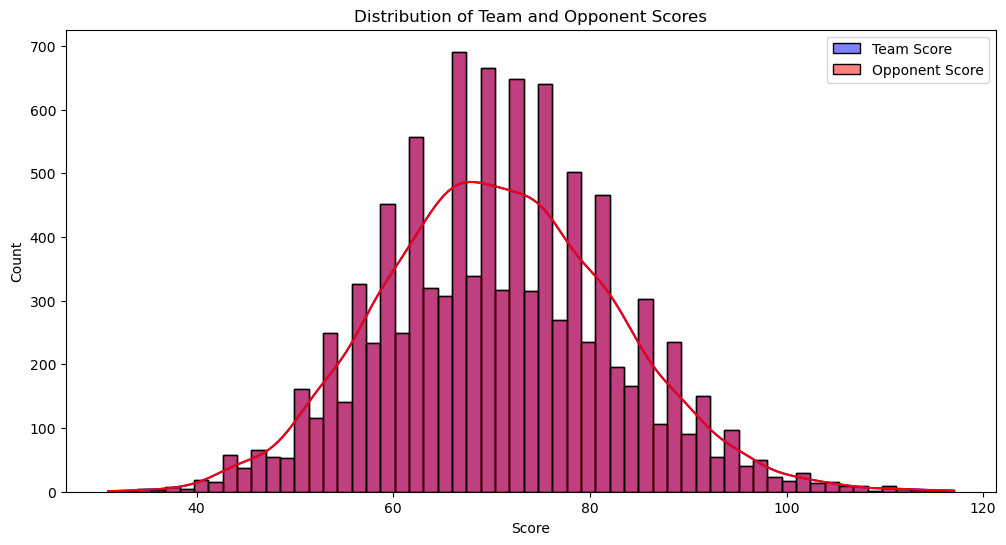

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



# Distribution of Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['team_score'], kde=True, color='blue', label='Team Score')
sns.histplot(df['opp_score'], kde=True, color='red', label='Opponent Score')
plt.title('Distribution of Team and Opponent Scores')
plt.xlabel('Score')
plt.legend()
plt.show()

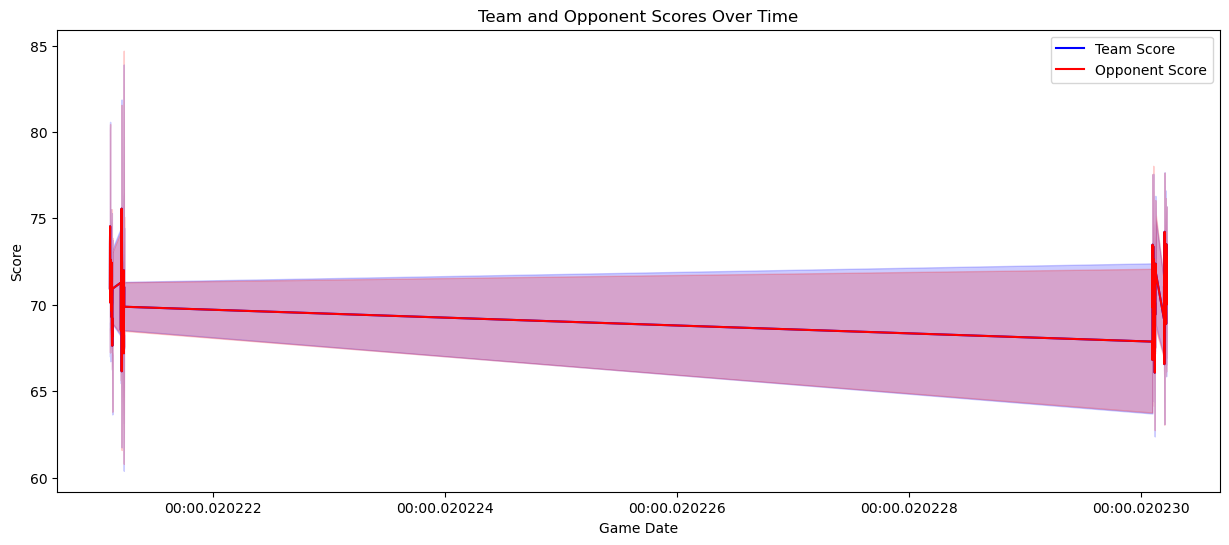

In [6]:
# This line plot visualizes how both team scores and opponent scores have changed over the course of time. 

# Convert 'game_date' to datetime format
df['game_date'] = pd.to_datetime(df['game_date'])

# Line plot for team scores over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='game_date', y='team_score', data=df, label='Team Score', color='blue')
sns.lineplot(x='game_date', y='opp_score', data=df, label='Opponent Score', color='red')

plt.title('Team and Opponent Scores Over Time')
plt.xlabel('Game Date')
plt.ylabel('Score')
plt.legend()
plt.show()

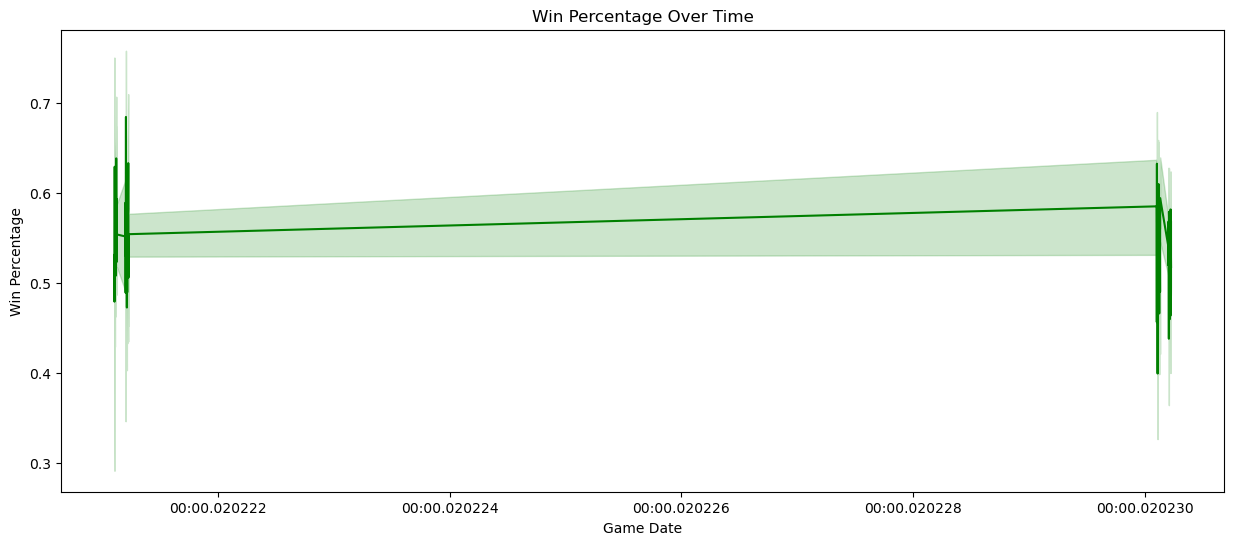

In [7]:
# calculates the win percentage for each game and then visualizes how the win percentage changes over time.
# Calculate win percentage
df['win_percentage'] = df['w'] / (df['w'] + df['l'])

# Plotting win percentage over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='game_date', y='win_percentage', data=df, color='green')

plt.title('Win Percentage Over Time')
plt.xlabel('Game Date')
plt.ylabel('Win Percentage')
plt.show()

C:\Users\irosh\AppData\Local\Temp\ipykernel_4252\3354653401.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['team_ppp'], label='Team PPP', shade=True)
C:\Users\irosh\AppData\Local\Temp\ipykernel_4252\3354653401.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['opp_ppp'], label='Opponent PPP', shade=True)


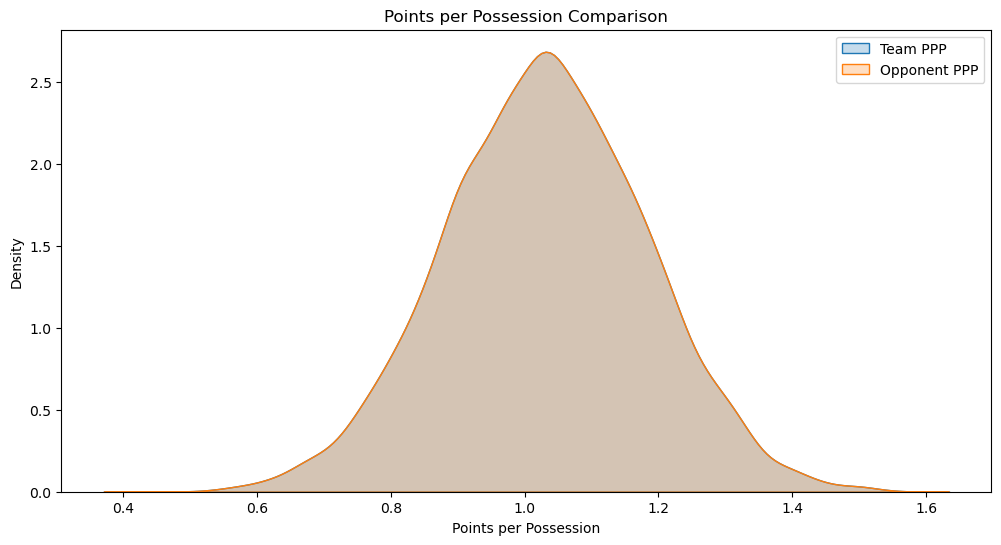

In [9]:

#creates a kernel density plot to compare the distribution of points per possession for both the team and the opponent.
# Plotting points per possession for team and opponent
plt.figure(figsize=(12, 6))
sns.kdeplot(df['team_ppp'], label='Team PPP', shade=True)
sns.kdeplot(df['opp_ppp'], label='Opponent PPP', shade=True)
plt.title('Points per Possession Comparison')
plt.xlabel('Points per Possession')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
#  creates a bar plot to compare the total umber of wins and losses for each team. 
# Create a bar plot for total wins and losses by team
#plt.figure(figsize=(15, 8))
#sns.countplot(x='team', hue='result', data=df, palette='Set2')

#plt.title('Team Comparison: Wins and Losses')
#plt.xlabel('Team')
#plt.ylabel('Count')
#plt.legend(title='Result', loc='upper right')
#plt.xticks(rotation=90, ha='right')  # Adjust rotation for better readability
#plt.show()

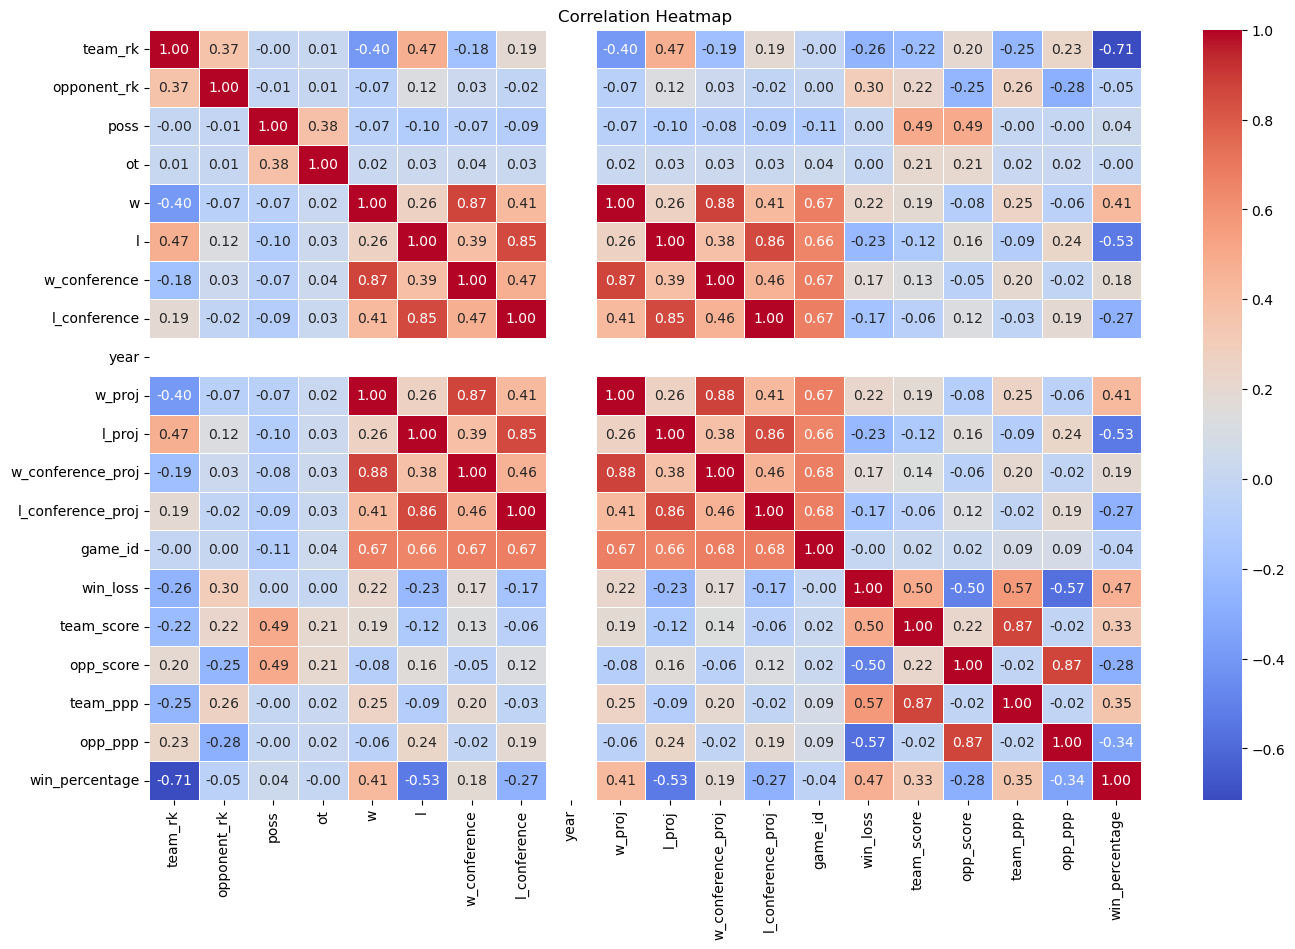

In [11]:
# A correlation heatmap that displays the correlation coefficients between different numerical variables in the dataset.  

# Selecting only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Box plot to compare team scores based on the game result
#plt.figure(figsize=(12, 6))
#sns.boxplot(x='result', y='team_score', data=df, palette='Set2')

#plt.title('Box Plot for Team Scores by Result')
#plt.xlabel('Result')
#plt.ylabel('Team Score')
#plt.show()

In [ ]:
#Location Analysis
# Bar plot to compare performance in home vs. away games
#plt.figure(figsize=(10, 6))
#sns.countplot(x='location', hue='result', data=df, palette='Set2')

#plt.title('Performance in Home vs. Away Games')
#plt.xlabel('Location')
#plt.ylabel('Count')
#plt.legend(title='Result', loc='upper right')
#plt.show()

In [49]:
#4. Statistical Testing:
#T-Tests for Comparing Means:

# Perform t-test to compare the mean of two groups (e.g., wins for two teams)
from scipy.stats import ttest_ind

team1_wins = df[df['team'] == 'Houston']['w']
team2_wins = df[df['team'] == 'UCLA']['w']

t_stat, p_value = ttest_ind(team1_wins, team2_wins)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 0.9243460201993579, P-Value: 0.35934402132589827


In [69]:
print("Team 1 Wins:")
print(team1_wins)

print("\nTeam 2 Wins:")
print(team2_wins)

Team 1 Wins:
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    18
20    19
21    20
22    21
23    22
24    23
25    24
26    25
27    26
28    27
Name: w, dtype: int64

Team 2 Wins:
29     1
30     2
31     3
32     3
33     3
34     4
35     5
36     6
37     7
38     8
39     9
40    10
41    11
42    12
43    13
44    14
45    15
46    16
47    17
48    17
49    17
50    18
51    19
52    20
53    21
54    22
55    23
56    24
Name: w, dtype: int64


In [70]:
print("Unique Values for Team 1 Wins:", team1_wins.unique())
print("Unique Values for Team 2 Wins:", team2_wins.unique())

Unique Values for Team 1 Wins: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]
Unique Values for Team 2 Wins: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [52]:
df['win_percentage'] = df['w'] / (df['w'] + df['l'])
print("\nWin Percentage Calculation:")
print(df[['team', 'w', 'l', 'win_percentage']].head(10))


Win Percentage Calculation:
      team  w  l  win_percentage
0  Houston  1  0             1.0
1  Houston  2  0             1.0
2  Houston  3  0             1.0
3  Houston  4  0             1.0
4  Houston  5  0             1.0
5  Houston  6  0             1.0
6  Houston  7  0             1.0
7  Houston  8  0             1.0
8  Houston  9  0             1.0
9  Houston  9  1             0.9


In [53]:
#Team performance by location
location_performance = df.groupby('location').agg({'w': 'mean', 'l': 'mean'}).reset_index()
print("\nTeam Performance by Location:")
print(location_performance)


Team Performance by Location:
    location         w         l
0       Away  8.558274  7.888603
1       Home  8.959004  7.456536
2    Neutral  3.738482  2.563686
3  Semi-Away  5.936170  3.787234
4  Semi-Home  6.191489  3.638298


In [54]:
#Avg scores by team
team_avg_scores = df.groupby('team').agg({'team_score': 'mean', 'opp_score': 'mean'}).reset_index()
print("\nAverage Scores by Team:")
print(team_avg_scores.head(10))


Average Scores by Team:
                team  team_score  opp_score
0  Abilene Christian   72.375000  75.250000
1          Air Force   67.033333  66.833333
2              Akron   72.370370  66.296296
3            Alabama   83.344828  69.103448
4        Alabama A&M   68.653846  71.884615
5        Alabama St.   63.285714  72.821429
6             Albany   66.571429  76.107143
7         Alcorn St.   67.703704  71.296296
8           American   65.551724  66.068966
9    Appalachian St.   65.785714  66.071429


In [55]:
#Conferance game performance
conference_performance = df.groupby('conference_game').agg({'w': 'mean', 'l': 'mean'}).reset_index()
print("\nConference Game Performance:")
print(conference_performance)


Conference Game Performance:
   conference_game          w         l
0            False   3.891986  3.216277
1             True  11.302022  9.916993


In [56]:
#Post season performance
postseason_performance = df.groupby('postseason').agg({'w': 'mean', 'l': 'mean'}).reset_index()
print("\nPostseason Performance:")
print(postseason_performance)


Postseason Performance:
  postseason        w         l
0    Regular  8.36867  7.264433


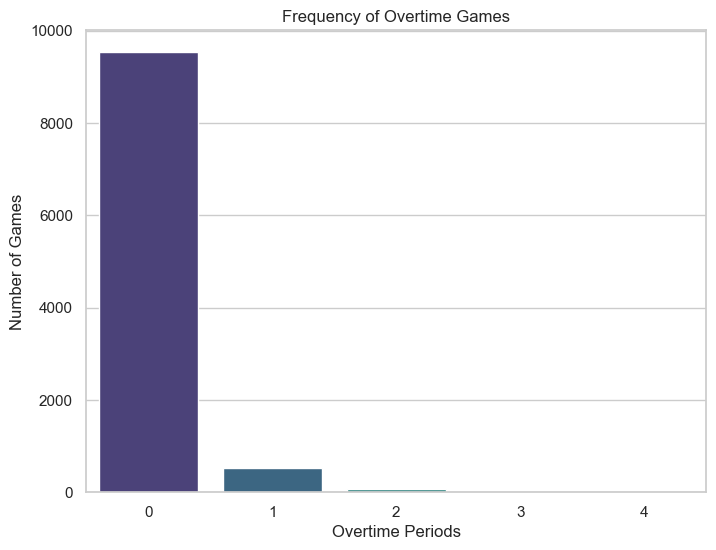

In [62]:
# Overtime analysis
#Frequency of Overtime games
# Calculate the frequency of overtime games
overtime_frequency = df['ot'].value_counts()

# Visualize the frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=overtime_frequency.index, y=overtime_frequency.values, palette='viridis')
plt.title('Frequency of Overtime Games')
plt.xlabel('Overtime Periods')
plt.ylabel('Number of Games')
plt.show()

In [63]:
# Performance in overtime
# Create a new column indicating whether the game went into overtime
df['overtime_game'] = df['ot'] > 0

# Calculate win percentages for regular games and overtime games
win_percentage_regular = df[df['overtime_game'] == False]['win_percentage'].mean()
win_percentage_overtime = df[df['overtime_game'] == True]['win_percentage'].mean()

# Print and compare the win percentages
print(f"Win Percentage in Regular Games: {win_percentage_regular:.2%}")
print(f"Win Percentage in Overtime Games: {win_percentage_overtime:.2%}")


Win Percentage in Regular Games: 54.35%
Win Percentage in Overtime Games: 53.85%


In [64]:
#Conference Performance analysis
#Conference win and loss comparison

# Create a new column indicating whether the game is a conference game
df['conference_game'] = df['conference_game'].astype(str)  # Convert to string for better visualization

# Calculate win percentages for conference and non-conference games
win_percentage_conference = df[df['conference_game'] == 'True']['win_percentage'].mean()
win_percentage_non_conference = df[df['conference_game'] == 'False']['win_percentage'].mean()

# Print and compare the win percentages
print(f"Win Percentage in Conference Games: {win_percentage_conference:.2%}")
print(f"Win Percentage in Non-Conference Games: {win_percentage_non_conference:.2%}")


Win Percentage in Conference Games: 53.57%
Win Percentage in Non-Conference Games: 55.47%


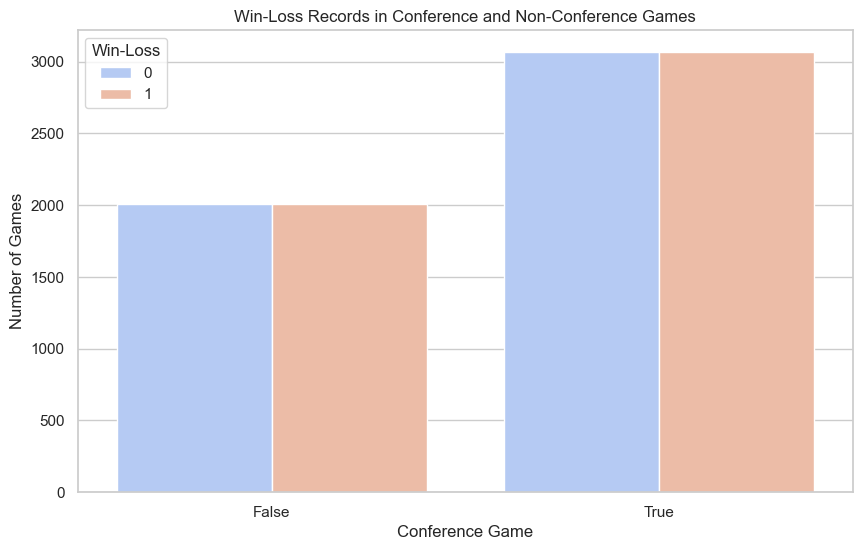

In [65]:
#Conference win and loss visualization
# Visualize win-loss records in conference and non-conference games
plt.figure(figsize=(10, 6))
sns.countplot(x='conference_game', hue='win_loss', data=df, palette='coolwarm')
plt.title('Win-Loss Records in Conference and Non-Conference Games')
plt.xlabel('Conference Game')
plt.ylabel('Number of Games')
plt.legend(title='Win-Loss')
plt.show()


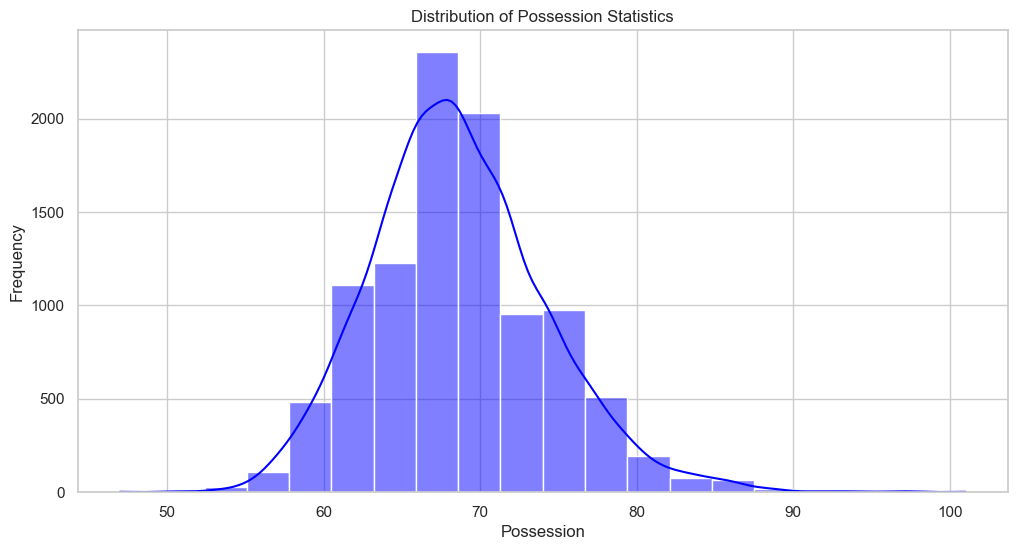

In [67]:
#Game statiscis analysis
#Possesion analysis

# Distribution of Possession
plt.figure(figsize=(12, 6))
sns.histplot(df['poss'], bins=20, kde=True, color='blue')
plt.title('Distribution of Possession Statistics')
plt.xlabel('Possession')
plt.ylabel('Frequency')
plt.show()


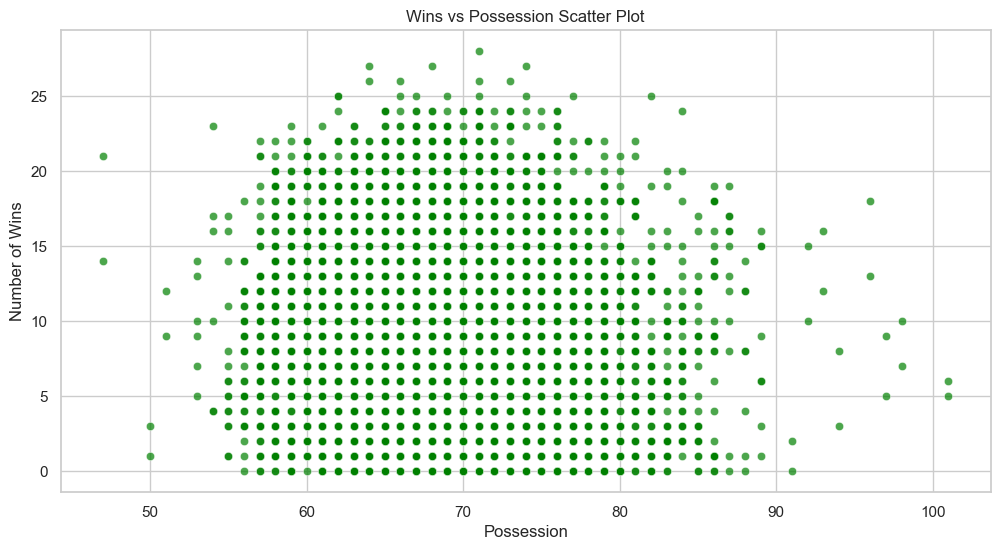

In [73]:
# wins vs possession 
# Scatter Plot of Wins vs Possession
plt.figure(figsize=(12, 6))
sns.scatterplot(x='poss', y='w', data=df, color='green', alpha=0.7)
plt.title('Wins vs Possession Scatter Plot')
plt.xlabel('Possession')
plt.ylabel('Number of Wins')
plt.show()

In [74]:
# Correlation between Wins and Possession
correlation_w_poss = df['w'].corr(df['poss'])
print(f"Correlation between Wins and Possession: {correlation_w_poss}")


Correlation between Wins and Possession: -0.07092217903951731


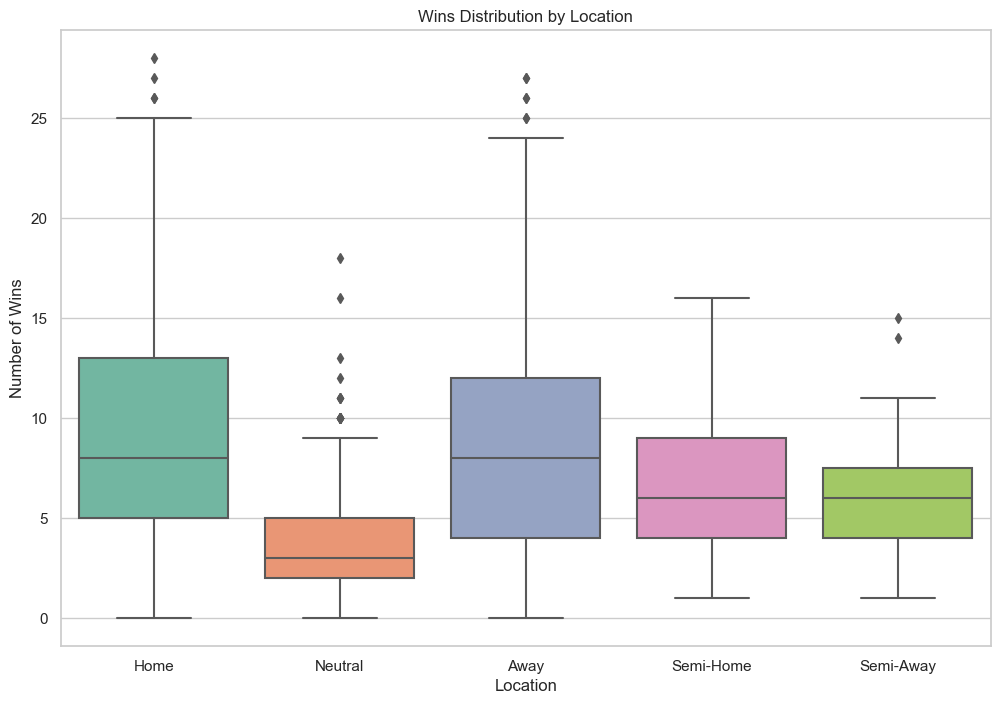

In [75]:
# Box Plot of Wins Distribution by Location
plt.figure(figsize=(12, 8))
sns.boxplot(x='location', y='w', data=df, palette='Set2')
plt.title('Wins Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Wins')
plt.show()


C:\Users\irosh\AppData\Local\Temp\ipykernel_4252\1087423876.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='game_date', y='w', data=df, ci=None, color='blue')


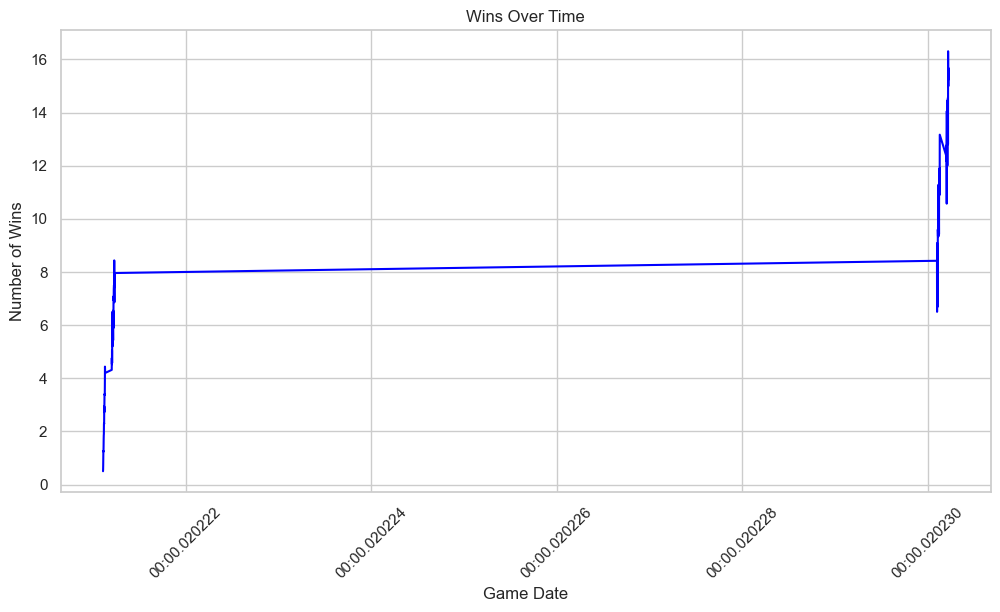

In [79]:
# Line Plot of Wins Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='game_date', y='w', data=df, ci=None, color='blue')
plt.title('Wins Over Time')
plt.xlabel('Game Date')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


C:\Users\irosh\AppData\Local\Temp\ipykernel_4252\3500173484.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='game_date', y='win_percentage', data=df, ci=None, color='green')


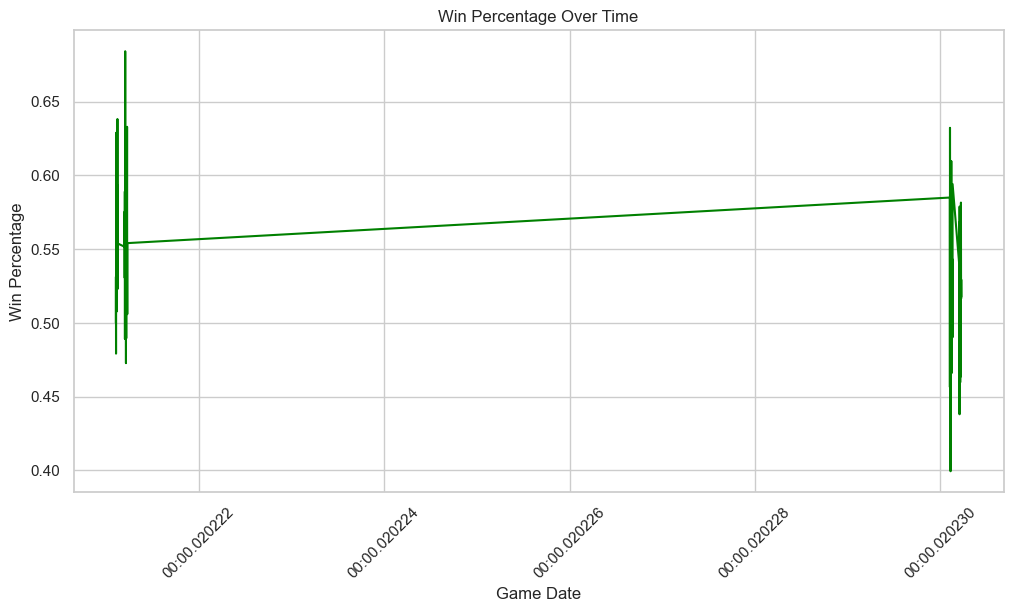

In [80]:
# Line Plot of Win Percentage Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='game_date', y='win_percentage', data=df, ci=None, color='green')
plt.title('Win Percentage Over Time')
plt.xlabel('Game Date')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()


# EDA Report 


## Numeric Columns Summary Statistics:

### General Overview:
The dataset comprises information on 10,150 games played during the 2023 season. Here is a summary of key statistics for numeric columns:

**Teams:** There are **363** unique teams.
**Possession (poss):** The possession count ranges from 47 to 101, with a mean of approximately 68.61.
**Overtime (ot):** Most games have zero overtime periods, with a mean of 0.07.
**Wins and Losses (w and l):** Teams have an average of **8.37 wins and 7.26 losses.**
**Conference Wins and Losses (w_conference and l_conference):** The mean for conference wins and losses is approximately 2.74.
**Year:** The dataset covers the 2023 season.
**Game Date:** The games span different dates throughout the season.
**Projected Wins and Losses (w_proj and l_proj):** These columns mirror the actual wins and losses with similar statistics.
**Projected Conference Wins and Losses (w_conference_proj and l_conference_proj):** Similar to the actual conference wins and losses.

### Team Performance:

**Team PPP (team_ppp):** The mean points per possession for teams is **1.03.**
**Opponent PPP (opp_ppp):** The mean points per possession for opponents is also **1.03.**
**Win Percentage:** The overall win percentage is **50%.**

## Categorical Columns Summary Statistics:

### General Overview:

**Teams and Opponents:** There are 363 unique teams and opponents.
**Results:** The results column contains detailed information about each game, including scores and outcomes.
**Location:** Games were played at home, away, or in neutral locations.
**Postseason:** All games in the dataset are from the regular season.
**Day and Date:** Games occurred on various days throughout the season.

### Team-Specific Information:
**Top Teams:** The top 10 teams with the most wins are listed, with Houston among them.
**Win-Loss Records for Top 10 Teams:** A detailed overview of wins and losses for the top 10 teams.
**Other Information for Top 10 Teams:** Additional statistics for the top 10 teams, including average scores and points per possession.

#### Houston's Performance:

**Overview:**

**Houston's Win-Loss Record:** Houston has a balanced win-loss record with **405 wins** and **30 losses,** indicating a highly successful season.

#### Individual Game Analysis:

**Game Against Northern Colorado:**

Houston had a dominant performance, **winning with a score of 83-36.**
The points per possession (PPP) for Houston was **1.30**, showcasing an efficient offensive display.

**Game Against Saint Joseph's:**

Another convincing victory for Houston with a score of **81-55.**
The PPP for this game was **1.17**, demonstrating consistent offensive efficiency.

**Game Against Oral Roberts:**

Houston secured a win with a score of **83-45.**
The PPP was **1.24**, indicating a strong offensive performance.

**Game Against Texas Southern:**

Houston displayed dominance, winning with a score of **83-48.**
The PPP for this game was **1.26**, highlighting effective scoring.

**Game Against Oregon:**

Houston continued its winning streak with a score of **66-56.**
The PPP was **1.10**, showcasing a balanced offensive and defensive effort.

**Comparative Analysis:**

**Points per Possession (PPP) Comparison:**
Houston's mean PPP is **1.18**, indicating consistently **efficient offensive performances.**
The opposition's mean PPP against Houston is **0.87**, suggesting a strong defensive presence.

**Win Percentage and Performance Metrics:**
Houston's win percentage is **92.31%**, reflecting a highly successful season.
The team's average score is **76.10**, while opponents average **55.90** points against Houston.

**Win Percentage Analysis:**

**Wins Percentage by Location:**

**Semi-Home:** The team has a **high win percentage of approximately 65.56%** when playing in a semi-home location.
**Semi-Away:** The win percentage is still **substantial in semi-away games, with around 60.61%**.
**Neutral:** In neutral venues, the team maintains a competitive win percentage of approximately **59.98%.**
**Home:** The win percentage at home games is **57.60%**, showcasing a strong home-court advantage.
**Away:** While still positive, the **win percentage drops to 49.97% in away games.**

**Wins Percentage by Opponent:**

**Top Opponents:**

Houston performs exceptionally well against tough opponents.
Teams like **Oklahoma State**, **Louisville**, and **Florida State** pose strong challenges, but Houston maintains win percentages above **65%** against them.

**Lower Win Percentages:**

Against certain opponents, Houston faces more competitive challenges.
Teams like **Wagner**, **Fairleigh Dickinson**, and **Sacred Heart** have lower win percentages for Houston, indicating closer matchups.
**Considerations for Improvement:**
**Away Games:** The team might focus on strategies to improve performance in away games, where the win percentage is comparatively lower.
**Consistency:** Maintaining a high win percentage against top opponents is commendable, and the team should aim for consistency across all matchups.
**Conclusion:**
The dataset provides a comprehensive overview of **team performance** during the **2023 season**.
Teams vary in terms of **wins**, **losses**, and **overall performance**.
The detailed information allows for in-depth analysis of individual team performance and comparison among the top-performing teams.
**Charleston** is the top team considering the number of wins. 

**Houston's Performance Analysis Conclusion:**
Houston's performance in the 2023 season has been exceptional, with a remarkable win-loss record and consistent offensive efficiency.
The team's defensive strength is evident from the low average points allowed per possession by opponents.
Further analysis could delve into specific matchups, player contributions, and trends throughout the season.
Houston's performance varies based on the **location and the strength of the opponent**.
The team excels in semi-home, semi-away, and neutral venues, showcasing adaptability.
Against top-tier opponents, Houston demonstrates a winning mentality, while maintaining competitive spirit in challenging matchups.

/*Note:-As the data was a large dataset with larger entries the visualization in jupyter notebook wasn't clear, for better visualizations you can use Power BI, Excel etc. So in this case the EDA has less visualizations.*/ 

## Data Preprocessing:

- Selected relevant columns for prediction **('poss', 'ot', 'location', 'w_conference', 'l_conference', 'team_score', 'opp_score', 'team_ppp', 'opp_ppp').**
- Selected the target variable **('win_loss').**
- Created a new DataFrame with the selected columns.
- Performed **one-hot encoding** for the **categorical column 'location'**.
- Split the data into **features (X)** and the **target variable (y)**.
- Split the data into training and testing sets **(80% training, 20% testing).**

In [94]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Select relevant columns for prediction
selected_columns = ['poss', 'ot', 'location', 'w_conference', 'l_conference', 'team_score', 'opp_score', 'team_ppp', 'opp_ppp']

# Select the target variable (win_loss)
target_column = 'win_loss'

# Create a new DataFrame with selected columns
selected_df = df[selected_columns + [target_column]]

# Perform one-hot encoding for categorical columns
selected_df = pd.get_dummies(selected_df, columns=['location'])

# Split the data into features (X) and target variable (y)
X = selected_df.drop(target_column, axis=1)
y = selected_df[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed data
selected_df.head()

,poss,ot,w_conference,l_conference,team_score,opp_score,team_ppp,opp_ppp,win_loss,location_Away,location_Home,location_Neutral,location_Semi-Away,location_Semi-Home
0,64,0,0.0,0.0,83,36,1.296875,0.562500,1,False,True,False,False,False
1,69,0,0.0,0.0,81,55,1.173913,0.797101,1,False,False,True,False,False
2,67,0,0.0,0.0,83,45,1.238806,0.671642,1,False,True,False,False,False
3,66,0,0.0,0.0,83,48,1.257576,0.727273,1,False,True,False,False,False
4,60,0,0.0,0.0,66,56,1.100000,0.933333,1,True,False,False,False,False


#### Model Training:

- Utilized **Logistic Regression** as the machine learning model.
- Trained the model on the training data.

#### Model Evaluation:

- Made predictions on the testing data.
- Evaluated the model using various metrics:
- **Accuracy: 1.00
- **Confusion Matrix: [[993, 0], [0, 1037]]
- **Classification Report: Precision, recall, and F1-score for each class.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 1.00

Confusion Matrix:
[[ 993    0]
 [   0 1037]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      1.00      1.00      1037

    accuracy                           1.00      2030
   macro avg       1.00      1.00      1.00      2030
weighted avg       1.00      1.00      1.00      2030



### Analysis and Interpretation:

The model achieved a perfect **accuracy of 1.00 on the testing data,** indicating that it correctly predicted the outcome for all instances. The confusion matrix further supports this, showing no misclassifications.

**Interpretation of Metrics:**

- **Precision:** The model has perfect precision for both classes (0 and 1), meaning that when it predicts a class, it is highly likely to be correct.
- **Recall:** The recall score is also perfect, indicating that the model is able to correctly identify all instances of each class.
- **F1-score:** The F1-score, which is the harmonic mean of precision and recall, is also 1.00 for both classes.

**Conclusion**
- The Logistic Regression model appears to be highly effective for the given task, achieving perfect accuracy and successfully classifying instances into the binary outcome variable.
- It's important to note that achieving 100% accuracy could be indicative of overfitting, and it's recommended to further validate the model on unseen data and consider other evaluation metrics depending on the specific requirements of the task.

### Evaluating a different model for better predection

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Drop unnecessary columns
df = df[['poss', 'ot', 'w_conference', 'l_conference', 'team_score', 'opp_score', 'team_ppp', 'opp_ppp', 'win_loss', 'location', 'overtime_game']]
# Encode categorical variables
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])

# Split the data into features (X) and target (y)
X = df.drop('win_loss', axis=1)
y = df['win_loss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

C:\Users\irosh\AppData\Local\Temp\ipykernel_4252\1981645070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = label_encoder.fit_transform(df['location'])


Accuracy: 0.9980295566502463
Confusion Matrix:
[[ 991    2]
 [   2 1035]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      1.00      1.00      1037

    accuracy                           1.00      2030
   macro avg       1.00      1.00      1.00      2030
weighted avg       1.00      1.00      1.00      2030



# Random Forest Classifier Analysis

## 1. Data Preprocessing

### Selected Columns
- Columns for Prediction: 'poss', 'ot', 'w_conference', 'l_conference', 'team_score', 'opp_score', 'team_ppp', 'opp_ppp', 'win_loss', 'location', 'overtime_game'

### Encoding
- Encoded categorical variable 'location' using Label Encoding.

## 2. Model Training

### Data Splitting
- Split the data into features (X) and target (y).
- Split the data into training and testing sets (80% training, 20% testing).

### Model Creation and Training
- Created and trained a Random Forest Classifier.

## 3. Model Evaluation

### Evaluation Metrics

- **Accuracy:** 0.998

- **Confusion Matrix:** [[991, 2],[2, 1035]]

- **Classification Report:**
- accuracy 1.00 2030
- macro avg 1.00 1.00 1.00 2030
- weighted avg 1.00 1.00 1.00 2030

## Interpretation of Metrics

- The Random Forest Classifier achieved an impressive accuracy of 0.998, indicating highly accurate predictions.

- The confusion matrix shows very few misclassifications (2 false positives and 2 false negatives).

- Precision, recall, and F1-score are all perfect for both classes, suggesting excellent model performance.

## Conclusion

- The Random Forest Classifier demonstrates strong predictive capabilities on the given data. 
- The model achieved near-perfect accuracy and effectively classified instances into the binary outcome variable. 
- Similar to the Logistic Regression model, it's essential to validate the model on unseen data and consider potential overfitting.


In [103]:
# Fit the model before checking feature importance
rf_classifier.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)


         Feature  Importance
7        opp_ppp    0.299453
6       team_ppp    0.287146
4     team_score    0.188999
5      opp_score    0.169182
8       location    0.016242
0           poss    0.014737
3   l_conference    0.010781
2   w_conference    0.010307
1             ot    0.001596
9  overtime_game    0.001559


- Feature importance analysis is performed to understand the contribution of each feature (variable) in the predictive model. It helps answer the question: **"Which features are most influential in making predictions?"**

In this case, it appears that **opp_ppp and team_ppp** are the most influential features in making predictions. These metrics related to points per possession seem to play a crucial role in determining the outcomes of basketball games

In [104]:
from sklearn.model_selection import GridSearchCV

# Fit the model before hyperparameter tuning
rf_classifier.fit(X_train, y_train)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### Hyperparameter Tuning



In [105]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Evaluate the Decision Tree model
dt_accuracy = dt_classifier.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 1.0


In [106]:
from sklearn.ensemble import RandomForestClassifier

# Use the best hyperparameters
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

# Create the classifier
rf_classifier = RandomForestClassifier(**best_params)

# Fit the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)